In [40]:
import json
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from yelpapi import YelpAPI

In [2]:
app_id = 'FTUzEBJLSrEfwOap206MMw'
app_key = 'YPwzyGGyAd9jFcTIJq6rIo-Gmbmlh5MtOli4exHEJSg9HOiJ8M6yNGqLSm1DYhboL-E0Mu9OG2egQjuGXwbf88EOY0wiUKkkAXAQEOUNDfk5jgOuQ2iYUHBKnYIdXnYx'
yapi = YelpAPI(app_key)


In [5]:
train_state = input("Enter State to train Data: ")
train_city = input("Enter City to train Data: ")

Enter State to train Data: CA
Enter City to train Data: San Diego


In [6]:
train_location = train_city.lower() + ", " + train_state.lower()
business_list = []

In [46]:
business_list = []
for i in range(0, 19):
    try:
        search_results = yapi.search_query(location = train_location, sort_by = 'review_count', limit = 50, offset = ((i * 25) + 1))
        #search_results = yapi.search_query(location = train_location, categories = "bubbletea", sort_by = 'review_count', limit = 25, offset = ((i * 25) + 1))
        business_list = business_list + search_results['businesses']
    except:
        break

In [47]:
df = pd.DataFrame(business_list)
len(df)

950

In [37]:

del df['display_phone']
del df['coordinates']
del df['image_url']
del df['is_closed']
del df['phone']
del df['transactions']
del df['url']
for i, cats in enumerate(df['categories']):
    out_list = []
    for category in cats:
        out_list.append(category['title'])
    df.at[i, 'categories'] = out_list


In [14]:
df_train = df
del df_train['alias']
del df_train['id']
del df_train['location']

In [48]:
categories = [len(cats) for cats in df['categories']]
rating = list(df['rating'])

In [50]:
len(categories)

950

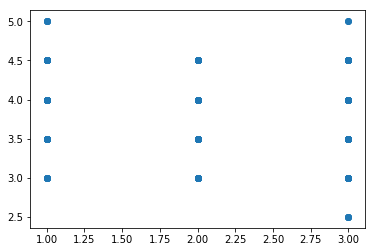

In [49]:
fig, ax = plt.subplots()
ax.scatter(categories, rating)
plt.show()

In [41]:
category_dict = {}
for cat in df['categories']:
    for category in cat:
        if category in category_dict.keys():
            category_dict[category] = category_dict[category] + 1
        else:
            category_dict.update({category: 1})
sorted_dict = {k: v for k, v in sorted(category_dict.items(), key=lambda item: item[1])}
print(sorted_dict)


{'Hainan': 1, 'Shanghainese': 1, 'African': 1, 'Performing Arts': 1, 'Brewpubs': 1, 'Specialty Food': 1, 'Food Court': 1, 'Dog Parks': 1, 'Salvadoran': 1, 'Beer, Wine & Spirits': 1, 'Zoos': 1, 'Gelato': 1, 'Venezuelan': 1, "Children's Museums": 1, 'Dinner Theater': 1, 'Teppanyaki': 1, 'Conveyor Belt Sushi': 1, 'Colombian': 1, 'Tours': 1, 'Jazz & Blues': 1, 'Kosher': 1, 'Tiki Bars': 1, 'Pop-Up Restaurants': 1, 'Street Vendors': 1, 'Acai Bowls': 1, 'Szechuan': 1, 'Patisserie/Cake Shop': 1, 'Bowling': 1, 'Brasseries': 1, 'Parks': 1, 'Amusement Parks': 2, 'Persian/Iranian': 2, 'Live/Raw Food': 2, 'Cupcakes': 2, 'Music Venues': 2, 'Gay Bars': 2, 'Whiskey Bars': 2, 'Dance Clubs': 2, 'Hiking': 2, 'Botanical Gardens': 2, 'Fish & Chips': 2, 'Hong Kong Style Cafe': 2, 'Seafood Markets': 2, 'Izakaya': 2, 'Food Stands': 2, 'Speakeasies': 2, 'Himalayan/Nepalese': 2, 'Hookah Bars': 2, 'Cheesesteaks': 2, 'Wraps': 2, 'Spanish': 3, 'Singaporean': 3, 'Art Museums': 3, 'Japanese Curry': 3, 'Tapas Bars': 

In [44]:
print(sum(categories_dict.values()))

NameError: name 'categories_dict' is not defined